In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [224]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2

def standardize_replicates(file_path, cell_line_num):
    df = pd.read_excel(file_path)

    # Subset the DataFrame to include only the plate readings
    plate_only_df = df.iloc[10:16, 2:12]

    if cell_line_num == 1:
        cell_line = plate_only_df.iloc[0:3, :]
    elif cell_line_num == 2:
        cell_line = plate_only_df.iloc[3:6, :]

    skax_file_name = df.iloc[0,0]
    print('skax_file_name', skax_file_name)

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()

    # Fetch the number of the last value in the cell_line_avg Series
    background = cell_line_med.iloc[-1]
    # print('Background median:', background)
    no_drug_response = cell_line_med.iloc[-2]
    # print('No drug response median:', no_drug_response)
    # print(cell_line)

    # Minus background from every column in cell_line
    cell_line = cell_line.sub(background)

    # print(cell_line)
    # Divide every column in cell_line by no_drug_response
    cell_line = cell_line.div(no_drug_response)*100


    # Remove the last two columns from cell_line dataframe
    cell_line = cell_line.iloc[:, :-2]

    return cell_line

In [ ]:
# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)

In [269]:
# Fit dose-response
def fit_dose_response(concentrations, cell_line):
    doses = np.array(concentrations[:-1])

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()
    responses = np.array(cell_line_med[:])

    # Fit the model to the data
    popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-50, -50, 0, 0], [200, 200, 200, 5]))

    # Extract the fitted parameters
    bottom, top, ic50, hill_slope = popt
    # print(f"IC50: {ic50}")

    # Generate doses for plotting the fit
    # Use a range that covers all data points
    doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
    responses_fit = dose_response(doses_fit, *popt)

    # print(responses_fit)
    return ic50, doses_fit, responses_fit


In [328]:
def plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title):
    doses = np.array(concentrations[:-1])
    # Plot the data and the fit
    plt.figure(figsize=(8, 6))
    plt.scatter(doses, cell_line.iloc[0, :], label='Data', color='#226E9C')
    plt.scatter(doses, cell_line.iloc[1, :], label='Data', color='#226E9C')
    plt.scatter(doses, cell_line.iloc[2, :], label='Data', color='#226E9C')
    plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
    # Plot vertical line and text
    plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
    plt.text(ic50, -13, f'IC50: {ic50:.2f}', color='#FC4E2A', ha='center', va='top', fontsize=8)

    plt.xscale('log')
    plt.xlabel('Dose (uM)')
    plt.ylabel('Fluorescence Intensity (% of control)')
    #plt.legend()
    plt.title(plot_title)
    # Display the IC50 value on the plot

    plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_title + '.png')
    plt.show()

skax_file_name 20240807_epa_G571_fluorescence_6hr.skax
responses [-0.5125444169268869 -0.6966727683859159 2.891138150102293
 70.21320124905782 86.5909335630451 93.97760310110908 96.77721546247442
 102.7533110800043]


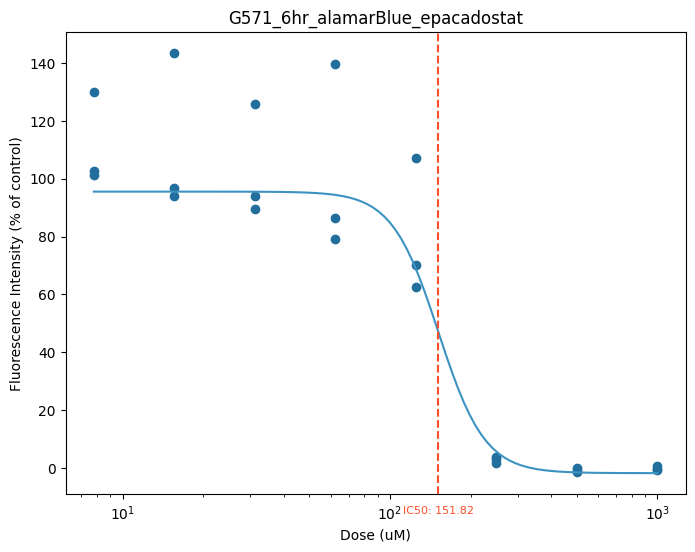

In [329]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations
plot_title = 'G571_6hr_alamarBlue_epacadostat'

cell_line = standardize_replicates(file_path, cell_line_num)
ic50, doses_fit, responses_fit = fit_dose_response(concentrations, cell_line)

plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title)

skax_file_name 20240807_D1MT_G523_G571_fluorescence_6hr.skax
skax_file_name 20240807_D1MT_G523_G571_fluorescence_6hr.skax


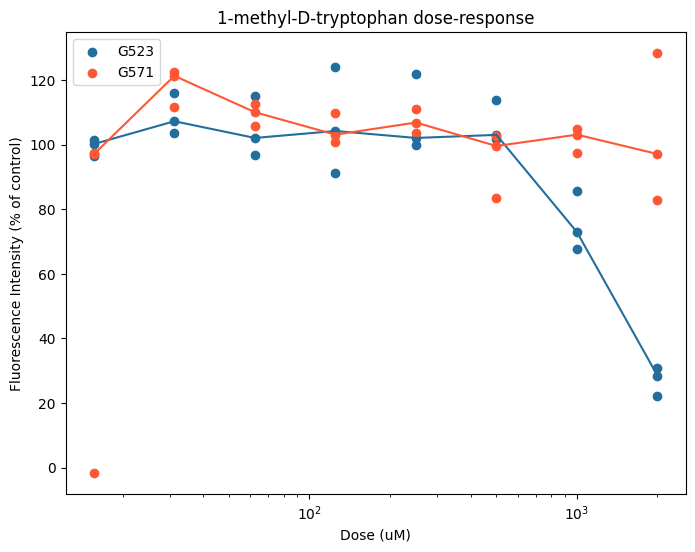

In [318]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-36-39-9798442.xlsx"
concentrations = [2000, 1000, 500, 250, 125, 62.5, 31.25, 15.625, 0]
plot_title = '20240807_D1MT_G523_fluorescence_6hr'

cell_line_1 = standardize_replicates(file_path, 1)
cell_line_2 = standardize_replicates(file_path, 2)

doses = np.array(concentrations[:-1])
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, cell_line_1.iloc[0, :], label='G523', color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[1, :], color='#226E9C')
plt.scatter(doses, cell_line_1.iloc[2, :], color='#226E9C')
plt.scatter(doses, cell_line_2.iloc[0, :], label='G571', color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[1, :], color='#FF5733')
plt.scatter(doses, cell_line_2.iloc[2, :], color='#FF5733')

plt.plot(doses, cell_line_1.median(), color='#226E9C')
plt.plot(doses, cell_line_2.median(), color='#FF5733')

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence Intensity (% of control)')
plt.legend()
plt.title('1-methyl-D-tryptophan dose-response')
# Display the IC50 value on the plot

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_title + '.png')
plt.show()



In [ ]:
modified_concentrations = [4000, 3000] + concentrations[:]
modified_cell_line = cell_line.copy()
modified_cell_line.insert(0, 'NewColumn', 0)
modified_cell_line.insert(0, 'NewColumn2', 0)
ic50, doses_fit, responses_fit = fit_dose_response(modified_concentrations, modified_cell_line)
plot_dose_response(cell_line, concentrations, doses_fit, responses_fit, ic50, plot_title)


In [295]:
doses = np.array(modified_concentrations[:-1])

# Find the median of each column in cell_line
cell_line_med = modified_cell_line.median()
responses = np.array(cell_line_med[:])
print('responses', responses)

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-50, -50, 0, 0], [150, 150, 300, 10]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
# print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

responses [0.0 0.0 28.463793103448275 72.94655172413793 103.05862068965517
 102.1103448275862 104.26551724137931 102.1103448275862 107.28275862068966
 100.21379310344827]


In [296]:
print(modified_cell_line)

    NewColumn2  NewColumn Unnamed: 2 Unnamed: 3  Unnamed: 4  Unnamed: 5  \
10           0          0  28.463793  72.946552  101.765517  102.110345   
11           0          0  22.101724  67.713793  103.058621   99.782759   
12           0          0  30.903448  85.817241   113.92069  122.024138   

    Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
10  104.265517   96.851724  103.489655  100.213793  
11   91.334483  102.110345  107.282759   96.506897  
12  124.006897  115.041379  116.075862  101.593103  


In [303]:
doses_fit

array([  15.625     ,   16.52516035,   17.47717917,   18.48404404,
         19.54891467,   20.67513277,   21.86623259,   23.12595198,
         24.45824414,   25.86729   ,   27.35751136,   28.93358476,
         30.60045616,   32.36335647,   34.22781792,   36.19969149,
         38.2851652 ,   40.49078361,   42.82346827,   45.29053951,
         47.89973937,   50.65925591,   53.57774893,   56.66437709,
         59.92882672,   63.38134214,   67.03275788,   70.89453264,
         74.97878525,   79.29833273,   83.86673047,   88.69831481,
         93.80824798,   99.21256575,  104.92822768,  110.97317039,
        117.36636383,  124.12787083,  131.27891002,  138.84192245,
        146.84064201,  155.3001699 ,  164.24705341,  173.70936922,
        183.71681153,  194.30078522,  205.49450441,  217.33309669,
        229.85371338,  243.09564608,  257.10045   ,  271.91207434,
        287.57700024,  304.14438664,  321.6662245 ,  340.19750004,
        359.79636723,  380.52433029,  402.44643674,  425.63148

In [304]:
responses_fit

array([128.05345573, 127.11971987, 126.17922232, 125.23205208,
       124.27830169, 123.31806728, 122.3514485 , 121.37854853,
       120.39947409, 119.41433533, 118.42324592, 117.42632291,
       116.42368676, 115.41546128, 114.40177357, 113.38275403,
       112.35853622, 111.32925689, 110.29505588, 109.25607606,
       108.21246325, 107.16436618, 106.11193642, 105.05532825,
       103.99469865, 102.93020713, 101.86201575, 100.79028891,
        99.71519336,  98.63689804,  97.55557398,  96.47139424,
        95.38453375,  94.29516924,  93.20347912,  92.10964334,
        91.0138433 ,  89.91626174,  88.8170826 ,  87.71649089,
        86.61467259,  85.51181451,  84.40810418,  83.30372971,
        82.19887964,  81.09374287,  79.98850847,  78.88336559,
        77.77850332,  76.67411054,  75.57037584,  74.46748732,
        73.36563253,  72.26499831,  71.16577068,  70.06813467,
        68.97227427,  67.87837224,  66.78661004,  65.69716766,
        64.61022358,  63.52595456,  62.44453561,  61.36

In [262]:
cell_line.insert(0, 'NewColumn', 0)

ValueError: cannot insert NewColumn, already exists

In [ ]:

popt, pcov = curve_fit(dose_response, doses, responses)
# return popt




print(doses)
print(responses)

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-50, -50, 0, 0], [200, 200, 200, 5]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

print(responses_fit)

In [222]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2

df = pd.read_excel(file_path)

# Subset the DataFrame to include only the plate readings
plate_only_df = df.iloc[10:16, 2:12]

if cell_line_num == 1:
    cell_line = plate_only_df.iloc[0:3, :]
elif cell_line_num == 2:
    cell_line = plate_only_df.iloc[3:6, :]

skax_file_name = df.iloc[0,0]
print('skax_file_name', skax_file_name)

# Find the median of each column in cell_line
cell_line_med = cell_line.median()

# Fetch the number of the last value in the cell_line_avg Series
background = cell_line_med.iloc[-1]
print('Background median:', background)
no_drug_response = cell_line_med.iloc[-2]
print('No drug response median:', no_drug_response)
print(cell_line)

# Minus background from every column in cell_line
cell_line = cell_line.sub(background)

print(cell_line)
# Divide every column in cell_line by no_drug_response
cell_line = cell_line.div(no_drug_response)*100


# Remove the last two columns from cell_line dataframe
cell_line = cell_line.iloc[:, :-2]

return cell_line



skax_file_name 20240807_epa_G571_fluorescence_6hr.skax
Background median: 18.73
No drug response median: 928.7
   Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
13      24.53      17.39      54.12       1014       1317       1186   
14      13.97      6.899      35.82      600.4      753.2      848.8   
15      12.33      12.26      45.58      670.8      822.9      891.5   

   Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  
13       1351       1227        1266       20.45  
14      892.4      958.5       928.7       18.73  
15      917.5        973       923.3       17.63  
   Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
13        5.8      -1.34      35.39     995.27    1298.27    1167.27   
14      -4.76    -11.831      17.09     581.67     734.47     830.07   
15       -6.4      -6.47      26.85     652.07     804.17     872.77   

   Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  
13    1332.27    1208.27     1247.27        1.72  
14   

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
13,0.624529,-0.144288,3.810703,107.168084,139.794336,125.688597,143.455368,130.10337
14,-0.512544,-1.273931,1.840207,62.632712,79.085819,89.379778,94.074513,101.191989
15,-0.689135,-0.696673,2.891138,70.213201,86.590934,93.977603,96.777215,102.753311


In [228]:
cell_line.iloc[0, :]

Unnamed: 2      0.624529
Unnamed: 3     -0.144288
Unnamed: 4      3.810703
Unnamed: 5    107.168084
Unnamed: 6    139.794336
Unnamed: 7    125.688597
Unnamed: 8    143.455368
Unnamed: 9     130.10337
Name: 13, dtype: object

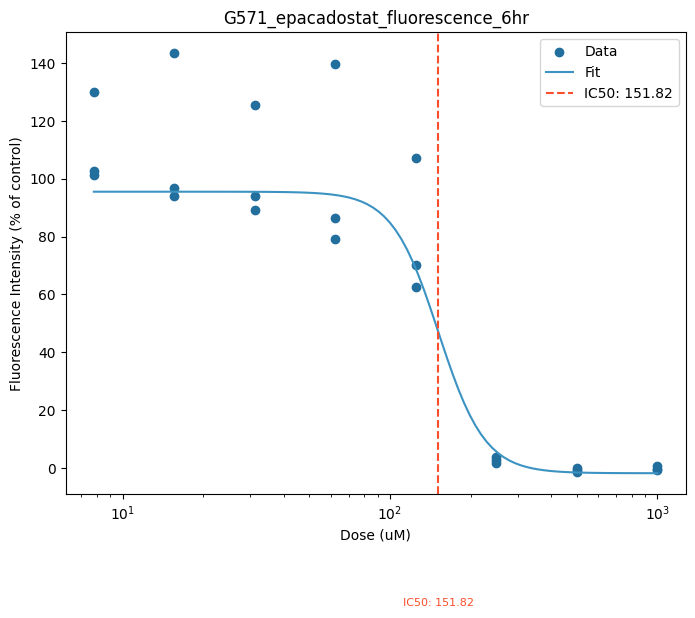

In [244]:
plot_title = 'G571_epacadostat_fluorescence_6hr'



In [216]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2

In [223]:
file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx"
cell_line_num = 2
# concentrations = [600, 300, 150, 100, 75, 37.5, 18.75, 9.375, 0]
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations

def plot_dose_reponse(file_path, cell_line_num, concentrations): 
    # Read the Excel file into a pandas DataFrame
    #df = pd.read_excel(file_path)
    df = pd.read_excel(file_path, sheet_name='Integrated') # For absorbance

    # Subset the DataFrame to include only the plate readings
    plate_only_df = df.iloc[10:16, 2:12]

    if cell_line_num == 1:
        cell_line = plate_only_df.iloc[0:3, :]
    elif cell_line_num == 2:
        cell_line = plate_only_df.iloc[3:6, :]

    skax_file_name = df.iloc[0,0]
    print('skax_file_name', skax_file_name)

    # Find the median of each column in cell_line
    cell_line_med = cell_line.median()

    # Fetch the number of the last value in the cell_line_avg Series
    background = cell_line_med.iloc[-1]
    print('Background Average:', background)

    # Subtract the background from the cell_line_avg Series
    cell_line_med = cell_line_med - background

    cell_line_med = cell_line_med.iloc[:-1]

    # Fetch the number of the last value in the cell_line_avg Series
    no_drug_response = cell_line_med.iloc[-1]
    print('no_drug_response', no_drug_response)

    # Remove the last value from the cell_line_avg Series
    cell_line_med = cell_line_med.iloc[:-1]

    print('cell_line_med', cell_line_med)

    # Divide by the no-drug response
    cell_line_med = cell_line_med/no_drug_response*100

    # Remove the last column from cell_line dataframe
    cell_line = cell_line.iloc[:, :-2]

    # Minus background from every column in cell_line
    cell_line = cell_line.sub(background)

    # Divide every column in cell_line by no_drug_response
    cell_line = cell_line.div(no_drug_response)*100
    cell_line

In [210]:
# file_path = 'C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 18 2024 16-59-49-6432008.xlsx'
# file_path = 'C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Jul Thu 18 2024 14-55-54-8492289.xlsx' # 4hr

# file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx" # 20240807_epa_G571_fluorescence_6hr.skax
# file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-37-19-1019439.xlsx" # 20240807_epa_G571_absorbance_6hr.skax


file_path = "C:/GSC Project/drug_dose_response/raw_data/temporarySkanitExport Aug Wed 7 2024 17-34-19-5418553.xlsx" # 20240807_epa_G571_absorbance.skax # 4hr


cell_line_num = 2

# Read the Excel file into a pandas DataFrame
#df = pd.read_excel(file_path)
df = pd.read_excel(file_path, sheet_name='Integrated') # For absorbance

 # Subset the DataFrame to include only the plate readings
plate_only_df = df.iloc[10:16, 2:12]

if cell_line_num == 1:
    cell_line = plate_only_df.iloc[0:3, :]
elif cell_line_num == 2:
    cell_line = plate_only_df.iloc[3:6, :]




cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
13,0.331,0.3431,0.3244,0.4625,0.4551,0.4595,0.5283,0.516,0.4414,0.4071
14,0.2724,0.2944,0.2943,0.4192,0.4564,0.4857,0.4778,0.499,0.5672,0.4509
15,0.2837,0.2823,0.2842,0.4613,0.4098,0.4359,0.4267,0.439,0.4348,0.4116


In [214]:
# Find the average of the repliactes in the last column
cell_line['average'] = cell_line.mean(axis=1)

C:\Users\xiazh\AppData\Local\Temp\ipykernel_39820\1053949738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_line['average'] = cell_line.mean(axis=1)


In [211]:
skax_file_name = df.iloc[0,0]
skax_file_name

'20240807_epa_G571_absorbance.skax'

In [212]:
# concentrations = [600, 300, 150, 100, 75, 37.5, 18.75, 9.375, 0]
concentrations = [1000, 500, 250, 125, 62.5, 31.25, 15.625, 7.8125, 0] # Epacadostat concentrations

# Find the median of each column in cell_line
cell_line_med = cell_line.median()
cell_line_mean = cell_line.mean(axis=1)

# Fetch the number of the last value in the cell_line_med Series
background = cell_line_med.iloc[-1]
print(background)

# Subtract the background from the cell_line_avg Series
cell_line_med = cell_line_med - background

cell_line_med = cell_line_med.iloc[:-1]

# Fetch the number of the last value in the cell_line_avg Series
no_drug_response = cell_line_med.iloc[-1]
print(no_drug_response)

# Remove the last value from the cell_line_avg Series
cell_line_med = cell_line_med.iloc[:-1]

print(cell_line_med)

# Divide by the no-drug response
cell_line_med = cell_line_med/no_drug_response*100

cell_line_med

# Remove the last column from cell_line dataframe
cell_line = cell_line.iloc[:, :-2]
cell_line

rep1 = cell_line.iloc[0, :]
rep2 = cell_line.iloc[1, :]
rep3 = cell_line.iloc[2, :]

0.4116
0.029799999999999993
Unnamed: 2   -0.1279
Unnamed: 3   -0.1172
Unnamed: 4   -0.1173
Unnamed: 5    0.0497
Unnamed: 6    0.0435
Unnamed: 7    0.0479
Unnamed: 8    0.0662
Unnamed: 9    0.0874
dtype: object


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
13,0.331,0.3431,0.3244,0.4625,0.4551,0.4595,0.5283,0.516
14,0.2724,0.2944,0.2943,0.4192,0.4564,0.4857,0.4778,0.499
15,0.2837,0.2823,0.2842,0.4613,0.4098,0.4359,0.4267,0.439


In [204]:
no_drug_response

0.029799999999999993

In [205]:
cell_line_med

Unnamed: 2   -429.194631
Unnamed: 3   -393.288591
Unnamed: 4   -393.624161
Unnamed: 5    166.778523
Unnamed: 6    145.973154
Unnamed: 7    160.738255
Unnamed: 8    222.147651
Unnamed: 9    293.288591
dtype: object

In [192]:
# Minus background from every column in cell_line
cell_line = cell_line.sub(background)

# Divide every column in cell_line by no_drug_response
cell_line = cell_line.div(no_drug_response)*100
cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
13,-19.692058,-10.372771,-24.878444,86.142626,79.092382,71.880065,143.354943,138.816856
14,-33.144246,-16.288493,-21.312804,86.223663,106.726094,134.764992,132.171799,154.051864
15,-19.448947,-32.333874,-33.063209,126.418152,86.466775,97.649919,94.408428,106.888169


In [193]:
rep1 = cell_line.iloc[0, :]
rep2 = cell_line.iloc[1, :]
rep3 = cell_line.iloc[2, :]

In [ ]:
# # Mean

# # Calculate the average of the replicates
# cell_line_avg = cell_line.mean(axis=0)

# # Fetch the number of the last value in the cell_line_avg Series
# background = cell_line_avg.iloc[-1]

# # Remove the last value from the cell_line_avg Series
# cell_line_avg = cell_line_avg.iloc[:-1]

# # Subtract the background from the cell_line_avg Series
# cell_line_avg = cell_line_avg - background

# # Fetch the number of the last value in the cell_line_avg Series
# no_drug_response = cell_line_avg.iloc[-1]
# # Remove the last value from the cell_line_avg Series
# cell_line_avg = cell_line_avg.iloc[:-1]

# # Divide by the no-drug response
# cell_line_avg = cell_line_avg/no_drug_response

In [242]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)

doses = np.array(concentrations[:-1])

# Find the median of each column in cell_line
cell_line_med = cell_line.median()
responses = np.array(cell_line_med[:])

print(doses)
print(responses)


[1000.      500.      250.      125.       62.5      31.25     15.625
    7.8125]
[-0.5125444169268869 -0.6966727683859159 2.891138150102293
 70.21320124905782 86.5909335630451 93.97760310110908 96.77721546247442
 102.7533110800043]


In [243]:
# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([-50, -50, 0, 0], [200, 200, 200, 5]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

print(responses_fit)

IC50: 151.81975233006136
[95.54446639 95.54445663 95.54444416 95.54442823 95.54440788 95.54438188
 95.54434865 95.5443062  95.54425196 95.54418266 95.54409412 95.54398099
 95.54383644 95.54365176 95.54341579 95.54311429 95.54272909 95.54223691
 95.54160807 95.54080463 95.5397781  95.53846654 95.53679083 95.53464988
 95.53191455 95.52841988 95.52395515 95.51825121 95.51096432 95.50165555
 95.48976444 95.47457553 95.45517574 95.43040013 95.39876298 95.35837052
 95.30681037 95.24101214 95.15707213 95.05003399 94.91361594 94.73987424
 94.51879249 94.23778758 93.88112708 93.42926132 92.85808864 92.13819842
 91.23417696 90.1041209  88.69958263 86.96626796 84.84589915 82.27970591
 79.21394268 75.60755971 71.44159638 66.72902475 61.52284323 55.91963801
 50.05614283 44.09786061 38.22125061 32.59331642 27.35344184 22.60144442
 18.39354525 14.74547893 11.64034645  9.03841441  6.88659812  5.12628588
  3.6990186   2.55012096  1.63067048  0.89826728  0.31702364 -0.1428991
 -0.50597496 -0.79206916 -1

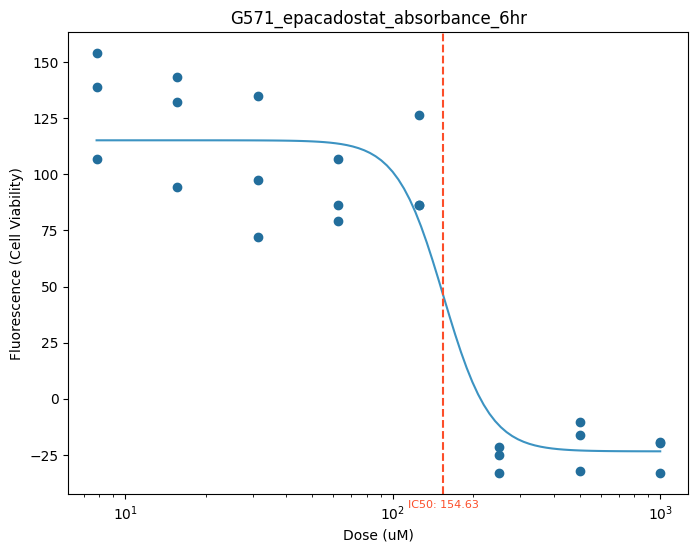

In [200]:
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, rep1, label='Data', color='#226E9C')
plt.scatter(doses, rep2, label='Data', color='#226E9C')
plt.scatter(doses, rep3, label='Data', color='#226E9C')
plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
# Plot vertical line and text
plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
plt.text(ic50, -45, f'IC50: {ic50:.2f}', color='#FC4E2A', ha='center', va='top', fontsize=8)

plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Fluorescence (Cell Viability)')
#plt.legend()
plt.title('G571_epacadostat_absorbance_6hr')
# Display the IC50 value on the plot

plt.savefig('C:/GSC Project/drug_dose_response/figures/' + 'G571_epacadostat_absorbance_6hr' + '.png')
plt.show()

IC50: 2.0389281871757703e-06


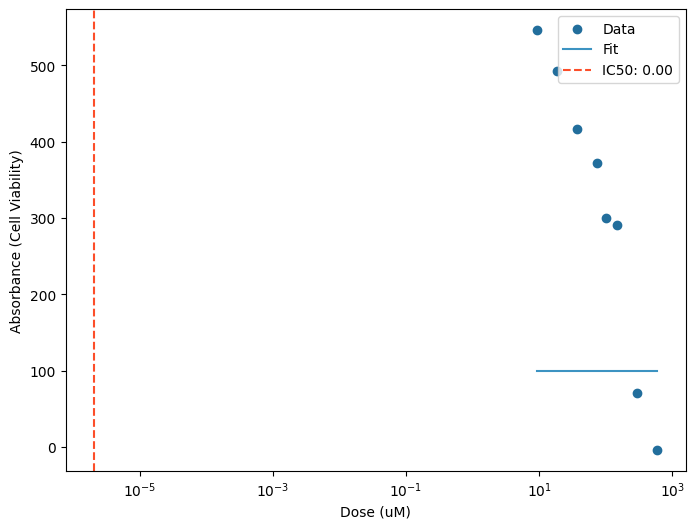

In [25]:
# Plot the dose-response curve
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)



# Remove the 0 dose and corresponding response
doses = np.array(concentrations[:-1])
responses = np.array(cell_line_avg[:-1])

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([0, 0, 0, 0], [100, 100, 100, 2]))

# Extract the fitted parameters
bottom, top, ic50, hill_slope = popt
print(f"IC50: {ic50}")

# Generate doses for plotting the fit
# Use a range that covers all data points
doses_fit = np.logspace(np.log10(min(doses)), np.log10(max(doses)), 100)
responses_fit = dose_response(doses_fit, *popt)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(doses, responses, label='Data', color='#226E9C')
plt.plot(doses_fit, responses_fit, label='Fit', color='#3C93C2')
plt.axvline(x=ic50, color='#FC4E2A', linestyle='--', label=f'IC50: {ic50:.2f}')
plt.xscale('log')
plt.xlabel('Dose (uM)')
plt.ylabel('Absorbance (Cell Viability)')
plt.legend()
#plt.title(plot_title)
#plt.savefig('C:/GSC Project/drug_dose_response/figures/' + plot_filename + '.png')
plt.show()

In [28]:
doses_fit

array([1.69363059e+03, 1.94726362e+03, 2.23887997e+03, 2.57416791e+03,
       2.95966756e+03, 3.40289849e+03, 3.91250634e+03, 4.49843153e+03,
       5.17210312e+03, 5.94666175e+03, 6.83721594e+03, 7.86113686e+03,
       9.03839709e+03, 1.03919603e+04, 1.19482290e+04, 1.37375599e+04,
       1.57948556e+04, 1.81602457e+04, 2.08798696e+04, 2.40067761e+04,
       2.76019588e+04, 3.17355452e+04, 3.64881651e+04, 4.19525230e+04,
       4.82352068e+04, 5.54587665e+04, 6.37641047e+04, 7.33132254e+04,
       8.42923938e+04, 9.69157694e+04, 1.11429584e+05, 1.28116944e+05,
       1.47303352e+05, 1.69363059e+05, 1.94726362e+05, 2.23887997e+05,
       2.57416791e+05, 2.95966756e+05, 3.40289849e+05, 3.91250634e+05,
       4.49843153e+05, 5.17210312e+05, 5.94666175e+05, 6.83721594e+05,
       7.86113686e+05, 9.03839709e+05, 1.03919603e+06, 1.19482290e+06,
       1.37375599e+06, 1.57948556e+06, 1.81602457e+06, 2.08798696e+06,
       2.40067761e+06, 2.76019588e+06, 3.17355452e+06, 3.64881651e+06,
      

In [17]:
# Example dose-response function (logistic function)
def dose_response(x, bottom, top, ic50, hill_slope):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill_slope)



# Remove the 0 dose and corresponding response
doses = np.array(concentrations)
responses = np.array(cell_line_avg)

# Fit the model to the data
popt, pcov = curve_fit(dose_response, doses, responses, bounds=([0, 0, 0, 0], [100, 100, 100, 2]))

In [49]:
doses

array([600.  , 300.  , 150.  , 100.  ,  75.  ,  37.5 ,  18.75])

In [46]:
responses = np.array(cell_line_avg)
responses

array([-3.979999999999997, 70.91333333333336, 290.87, 299.50333333333333,
       371.9033333333333, 417.00333333333333, 492.4366666666667, 546.27,
       569.87], dtype=object)

In [16]:
# Get all file names in the directory
import os
file_names = os.listdir('C:/GSC Project/drug_dose_response/raw_data')

# Filter the file names to include only Wed 7
file_names = [f for f in file_names if 'Wed 7' in f]

file_names

['temporarySkanitExport Aug Wed 7 2024 17-32-38-4934330.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-33-12-6582261.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-33-38-5612691.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-19-5418553.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-34-9452369.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-34-54-2441755.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-35-20-3021668.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-05-3241490.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-20-7278336.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-36-39-9798442.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-37-19-1019439.xlsx',
 'temporarySkanitExport Aug Wed 7 2024 17-37-40-1270088.xlsx']

In [17]:
# Open the first file in the list
file_path = 'C:/GSC Project/drug_dose_response/raw_data/' + file_names[0]
df = pd.read_excel(file_path)

df

,Measurement results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,20240807_D1MT_G523_G571_absorbance.skax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-07 3:15:19 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absorbance 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wavelength: 570 nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,D1MT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abs,1.0,2,3,4,5,6,7,8,9,10,11,12.0
9,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cell_line_num = 1

 # Subset the DataFrame to include only the plate readings
plate_only_df = df.iloc[10:16, 2:12]

if cell_line_num == 1:
    cell_line = plate_only_df.iloc[0:3, :]
elif cell_line_num == 2:
    cell_line = plate_only_df.iloc[3:6, :]


cell_line

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
10,0.3498,0.4139,0.4285,0.4601,0.5181,0.4745,0.4376,0.4813,0.4374,0.3298
11,0.3752,0.443,0.4809,0.498,0.4891,0.4627,0.4357,0.4754,0.4103,0.264
12,0.2932,0.3519,0.3886,0.5575,0.4106,0.4138,0.3594,0.356,0.3814,0.3018


In [19]:
file_path = 'C:/GSC Project/drug_dose_response/raw_data/' + file_names[1]
df = pd.read_excel(file_path)

df

,Measurement results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,20240807_D1MT_G523_G571_absorbance_600.skax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-07 3:17:46 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absorbance 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wavelength: 600 nm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Plate 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Abs,1.0,2,3,4,5,6,7,8,9,10,11,12.0
9,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Open this file drug_dose_response\cleaned_up_data\20240807_G571_epa_fluo.xlsx
file_path = 'C:/GSC Project/drug_dose_response/cleaned_up_data/20240807_G571_epa_fluo.xlsx'
df = pd.read_excel(file_path)

df

,Dose (uM),1000,500,250,125,62.5,31.25,15.625,7.8125,0,-1
0,6hr_12nm,24.53,17.390,54.12,1014.0,1317.0,1186.0,1351.0,1227.0,1266.0,20.45
1,6hr_12nm,13.97,6.899,35.82,600.4,753.2,848.8,892.4,958.5,928.7,18.73
2,6hr_12nm,12.33,12.260,45.58,670.8,822.9,891.5,917.5,973.0,923.3,17.63
3,4hr_5nm,27.87,18.630,48.08,938.3,1345.0,1237.0,1461.0,1359.0,1410.0,28.43
4,4hr_5nm,24.38,10.530,53.20,710.5,1033.0,1172.0,1182.0,1390.0,1235.0,30.36
5,4hr_5nm,19.92,22.280,55.78,875.7,1171.0,1244.0,1181.0,1214.0,1267.0,27.76
6,4hr_12nm,23.11,16.520,39.86,750.6,1082.0,1026.0,1224.0,1136.0,1175.0,25.50
7,4hr_12nm,21.22,10.100,41.70,592.5,853.6,983.0,995.5,1103.0,1008.0,23.61
8,4hr_12nm,19.28,18.450,48.69,735.4,969.5,1045.0,1010.0,1033.0,1054.0,24.65


In [23]:
# Transpose the dataframe
df.columns = df.iloc[0]
df = df[1:]
df

,0,1,2,3,4,5,6,7,8
Dose (uM),6hr_12nm,6hr_12nm,6hr_12nm,4hr_5nm,4hr_5nm,4hr_5nm,4hr_12nm,4hr_12nm,4hr_12nm
1000,24.53,13.97,12.33,27.87,24.38,19.92,23.11,21.22,19.28
500,17.39,6.899,12.26,18.63,10.53,22.28,16.52,10.1,18.45
250,54.12,35.82,45.58,48.08,53.2,55.78,39.86,41.7,48.69
125,1014.0,600.4,670.8,938.3,710.5,875.7,750.6,592.5,735.4
62.5,1317.0,753.2,822.9,1345.0,1033.0,1171.0,1082.0,853.6,969.5
31.25,1186.0,848.8,891.5,1237.0,1172.0,1244.0,1026.0,983.0,1045.0
15.625,1351.0,892.4,917.5,1461.0,1182.0,1181.0,1224.0,995.5,1010.0
7.8125,1227.0,958.5,973.0,1359.0,1390.0,1214.0,1136.0,1103.0,1033.0
0,1266.0,928.7,923.3,1410.0,1235.0,1267.0,1175.0,1008.0,1054.0


In [25]:
# Convert dataframe into long format, make the column names the values of a new column   
# Convert to long format
df_long = pd.melt(df, id_vars=['Dose (uM)'], var_name='Measurement', value_name='Value')

df_long

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Dose (uM)']"